### Sensitivity analysis for OW installed capacity

All sensitivities combined in one chart (period locked in at 2050)

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from constants import NO_NODES, WIND_FARM_NODES
from cycler import cycler

SENSITIVITIES = ["Cap", "CapFloating", "CapGrounded", "Opex", "Cables", "HubCost", "OnshrWind"]
SENSITIVITIES_TO_LABES = {
    "Cap": "CAPEX OW",
    "CapFloating": "CAPEX floating",
    "CapGrounded": "CAPEX grounded",
    "Opex": "OPEX OW",
    "Cables": "Cables cost",
    "HubCost": "Hub cost",
    "OnshrWind": "Onshore wind capacity"
}

SENSITIVITY_CASES = dict({})

for sens in SENSITIVITIES:
    cases = ["Base"] + [sens + "/" + sens + "P" + str(percentage) for percentage in range(10, 40, 10)] \
                        + [sens + "/" + sens + "N" + str(percentage) for percentage in range(10, 40, 10)]
    SENSITIVITY_CASES[sens] = cases

DF_BY_CASES = dict({})

for sens, sens_cases in SENSITIVITY_CASES.items():
    for case in sens_cases:
        _df = pd.read_csv(f'Results/{case}/results_output_gen.csv')
        # Define case value for plots
        case_sensitivity = None
        if case[-3] == "P":
            case_sensitivity = "+" + case[-2:] + "%"
        elif case[-3] == "N":
            case_sensitivity = "-" + case[-2:] + "%"
        _df["Sensitivity"] = sens
        _df["Case"] = case_sensitivity if case_sensitivity is not None else case
        DF_BY_CASES[(sens, case)] = _df

DF_BY_CASES

{('Cap',
  'Base'):           Node         GeneratorType     Period  genInvCap_MW  \
 0      BosniaH      Liginiteexisting  2020-2025      0.000000   
 1      BosniaH      Liginiteexisting  2025-2030      0.000000   
 2      BosniaH      Liginiteexisting  2030-2035      0.000000   
 3      BosniaH      Liginiteexisting  2035-2040      0.000000   
 4      BosniaH      Liginiteexisting  2040-2045      0.000000   
 ...        ...                   ...        ...           ...   
 5899  SørvestD  Windoffshorefloating  2035-2040      0.000058   
 5900  SørvestD  Windoffshorefloating  2040-2045      0.000224   
 5901  SørvestD  Windoffshorefloating  2045-2050      0.000415   
 5902  SørvestD  Windoffshorefloating  2050-2055      0.000010   
 5903  SørvestD  Windoffshorefloating  2055-2060      0.000745   
 
       genInstalledCap_MW  genExpectedCapacityFactor  \
 0            1888.000000               7.500000e-01   
 1            1161.846154               7.258454e-01   
 2             780.

Merge data sets

In [12]:
df_combined = pd.concat([_df for _df in DF_BY_CASES.values()])
df_combined

,Node,GeneratorType,Period,genInvCap_MW,genInstalledCap_MW,genExpectedCapacityFactor,DiscountedInvestmentCost_Euro,genExpectedAnnualProduction_GWh,Sensitivity,Case
0,BosniaH,Liginiteexisting,2020-2025,0.000000,1888.000000,7.500000e-01,0.000000,12404.159666,Cap,Base
1,BosniaH,Liginiteexisting,2025-2030,0.000000,1161.846154,7.258454e-01,0.000000,7387.489000,Cap,Base
2,BosniaH,Liginiteexisting,2030-2035,0.000000,780.615385,6.398026e-01,0.000000,4375.092245,Cap,Base
3,BosniaH,Liginiteexisting,2035-2040,0.000000,544.615385,3.445957e-03,0.000000,16.440078,Cap,Base
4,BosniaH,Liginiteexisting,2040-2045,0.000000,377.600000,5.313645e-08,0.000000,0.000176,Cap,Base
...,...,...,...,...,...,...,...,...,...,...
5899,SørvestD,Windoffshorefloating,2035-2040,0.000619,0.003627,3.533197e-01,948.920614,0.011225,OnshrWind,-30%
5900,SørvestD,Windoffshorefloating,2040-2045,0.001629,0.005255,3.645084e-01,1598.996554,0.016779,OnshrWind,-30%
5901,SørvestD,Windoffshorefloating,2045-2050,0.003950,0.008779,4.133973e-01,2497.121109,0.031793,OnshrWind,-30%
5902,SørvestD,Windoffshorefloating,2050-2055,0.000125,0.008547,3.589387e-01,45.206424,0.026874,OnshrWind,-30%


Select only OW sources in NS and period 2045-2050

In [13]:
#df_ow = df_combined[(df_combined['GeneratorType'] == 'Windoffshorefloating') | (df_combined['GeneratorType'] == 'Windoffshoregrounded')]
df_ow_NS = df_combined[df_combined["Node"].isin(WIND_FARM_NODES)]
df_ow_NS = df_ow_NS[df_ow_NS["Period"] == "2045-2050"]
df_ow_NS

,Node,GeneratorType,Period,genInvCap_MW,genInstalledCap_MW,genExpectedCapacityFactor,DiscountedInvestmentCost_Euro,genExpectedAnnualProduction_GWh,Sensitivity,Case
5413,MorayFirth,Windoffshoregrounded,2045-2050,587.999967,5464.999951,0.351140,3.138903e+08,16810.282557,Cap,Base
5421,FirthofForth,Windoffshoregrounded,2045-2050,93.199946,10529.999921,0.344674,4.975266e+07,31793.691964,Cap,Base
5429,DoggerBank,Windoffshoregrounded,2045-2050,0.000798,16259.999984,0.456084,4.262261e+02,64963.553069,Cap,Base
5437,Hornsea,Windoffshoregrounded,2045-2050,1218.000063,12054.999985,0.422887,6.502014e+08,44657.631609,Cap,Base
5445,OuterDowsing,Windoffshoregrounded,2045-2050,2185.500007,6264.999976,0.352219,1.166679e+09,19330.262958,Cap,Base
...,...,...,...,...,...,...,...,...,...,...
5869,NordavindC,Windoffshorefloating,2045-2050,0.000029,0.043689,0.395387,1.853298e+01,0.151322,OnshrWind,-30%
5877,VestavindE,Windoffshorefloating,2045-2050,0.003230,0.252283,0.360926,2.041977e+03,0.797646,OnshrWind,-30%
5885,SørvestE,Windoffshorefloating,2045-2050,0.004728,0.008431,0.399250,2.988971e+03,0.029487,OnshrWind,-30%
5893,SørvestA,Windoffshorefloating,2045-2050,0.004128,0.009377,0.352999,2.609879e+03,0.028996,OnshrWind,-30%


Plot capacity of offshore wind by sensitivity case

Diff cap vs cap floating: -1GW; In %: -1.2%
Installed offshore wind capacity (GW) in 2050 NS - sensitivity


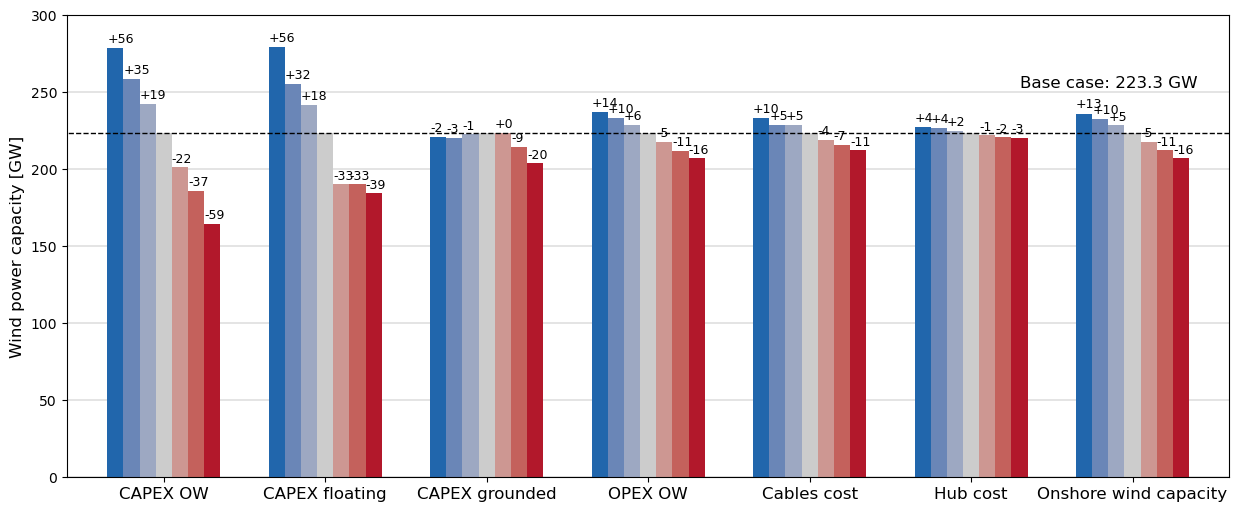

In [25]:
# Group the data by 'Period' and 'Case' and sum the 'genInstalledCap_MW' for each group
grouped_data = df_ow_NS.groupby(['Sensitivity', 'Case'], sort=False)['genInstalledCap_MW'].sum().unstack()

# Convert the summed values from MW to GW by dividing by 1000
grouped_data = grouped_data / 1000

case_order = ['-30%', '-20%', '-10%', 'Base', '+10%', '+20%','+30%']

# Plot the grouped data as a bar chart
plt.rcParams.update({'font.size': 10})
plt.rcParams['axes.prop_cycle'] = cycler(color=['#2166ac', '#6a86b7', '#9da8c2', '#cccccc', '#cd9792', '#c4615c', '#b2182b'])
ax = grouped_data[case_order].plot(kind='bar', figsize=(15, 6), width=0.7)

base_GW = grouped_data["Base"]["Cap"]
n30_cap_GW = grouped_data["-30%"]["Cap"]
n30_capFloating_GW = grouped_data["-30%"]["CapFloating"]

print(f"Diff cap vs cap floating: {round(n30_cap_GW-n30_capFloating_GW)}GW; In %: {round(((n30_cap_GW-n30_capFloating_GW)/n30_cap_GW)*100-1, 1)}%")

# Customize the chart
print(f'Installed offshore wind capacity (GW) in 2050 NS - sensitivity')
ax.set_ylabel('Wind power capacity [GW]', fontsize=12)
ax.set_xlabel(None)
ax.legend().remove()
#ax.legend(loc='upper left')
y_max=300
ax.set_ylim(0, y_max)
ax.yaxis.grid(color='gray', linestyle='-', lw=0.3)
ax.set_axisbelow(True)
ax.set_xticklabels([SENSITIVITIES_TO_LABES[sens] for sens in SENSITIVITIES], rotation=0, fontsize=12)
ax.hlines(y=base_GW, xmin=-1, xmax=7, linewidth=1, linestyles="--", color='black')
plt.text(x=5.3, y=y_max*0.87, s=f"Base case: {round(base_GW, 1)} GW", verticalalignment='top', fontsize=12)

for i in range(len(SENSITIVITIES)):
    for j in range(len(case_order)):
        current_GW = grouped_data[case_order[j]][SENSITIVITIES[i]]
        diff_to_base_GW = current_GW - base_GW
        if abs(diff_to_base_GW) > 0.2:
            plt.text(x=i-0.35+j*0.1, y=current_GW+10-j*0.1, s=f"{'+' if diff_to_base_GW > 0 else ''}{round(diff_to_base_GW)}", verticalalignment='top', fontsize=9)

plt.savefig(f"SavedFigs/OW-sens-NS/Combined", bbox_inches="tight")
plt.show()

Calculate total investment cost until 2050 by scenarios

In [15]:
df_inv_NS = df_combined[df_combined["Node"].isin(WIND_FARM_NODES)]
# Exclude from 2050-2060
df_inv_NS = df_inv_NS[(df_inv_NS["Period"] != "2050-2055") & (df_inv_NS["Period"] != "2055-2060")]
grouped_inv_NS = df_inv_NS.groupby(['Sensitivity', 'Case'], sort=False)['DiscountedInvestmentCost_Euro'].sum().unstack()
grouped_inv_NS

Case,Base,+10%,+20%,+30%,-10%,-20%,-30%
Sensitivity,,,,,,,
Cap,2.638533e+11,2.472367e+11,2.311658e+11,2.061217e+11,2.765709e+11,2.745982e+11,2.711404e+11
CapFloating,2.638533e+11,2.346115e+11,2.346115e+11,2.295485e+11,2.764456e+11,2.841296e+11,2.964563e+11
CapGrounded,2.638533e+11,2.663301e+11,2.582649e+11,2.387044e+11,2.635622e+11,2.507710e+11,2.360244e+11
Opex,2.638533e+11,2.597961e+11,2.562563e+11,2.520709e+11,2.691591e+11,2.722802e+11,2.748152e+11
Cables,2.638533e+11,2.564398e+11,2.503732e+11,2.441800e+11,2.747391e+11,2.747391e+11,2.827981e+11
HubCost,2.638533e+11,2.608200e+11,2.577797e+11,2.553047e+11,2.671989e+11,2.718379e+11,2.743392e+11
OnshrWind,2.638533e+11,2.576697e+11,2.521179e+11,2.454662e+11,2.699982e+11,2.751148e+11,2.806719e+11


In [16]:
# Cost savings capex only floating vs both
cost_CapN30 = grouped_inv_NS["-30%"]["Cap"]
cost_CapFloatingN30 = grouped_inv_NS["-30%"]["CapFloating"]

cost_diff = (cost_CapFloatingN30 - cost_CapN30) / 10**9 # in BEUR
cost_diff

25.315955898742217

#### For NO OW

In [17]:
df_ow_NO = df_ow_NS[df_ow_NS["Node"].isin(NO_NODES)]
df_ow_NO

,Node,GeneratorType,Period,genInvCap_MW,genInstalledCap_MW,genExpectedCapacityFactor,DiscountedInvestmentCost_Euro,genExpectedAnnualProduction_GWh,Sensitivity,Case
5501,NordvestA,Windoffshoregrounded,2045-2050,0.000000,0.000000,0.000000,0.000000,0.000000,Cap,Base
5509,NordvestC,Windoffshoregrounded,2045-2050,0.000000,0.000000,0.000000,0.000000,0.000000,Cap,Base
5517,VestavindA,Windoffshoregrounded,2045-2050,0.000000,0.000000,0.000000,0.000000,0.000000,Cap,Base
5525,SønnavindA,Windoffshoregrounded,2045-2050,0.000000,0.000000,0.000000,0.000000,0.000000,Cap,Base
5533,SørvestC,Windoffshoregrounded,2045-2050,0.001197,8829.999985,0.467322,638.774801,36147.709963,Cap,Base
...,...,...,...,...,...,...,...,...,...,...
5869,NordavindC,Windoffshorefloating,2045-2050,0.000029,0.043689,0.395387,18.532982,0.151322,OnshrWind,-30%
5877,VestavindE,Windoffshorefloating,2045-2050,0.003230,0.252283,0.360926,2041.976774,0.797646,OnshrWind,-30%
5885,SørvestE,Windoffshorefloating,2045-2050,0.004728,0.008431,0.399250,2988.971336,0.029487,OnshrWind,-30%
5893,SørvestA,Windoffshorefloating,2045-2050,0.004128,0.009377,0.352999,2609.878922,0.028996,OnshrWind,-30%


Diff cap vs cap floating: 0GW; In %: -0.9%
Installed offshore wind capacity (GW) in 2050 NO - sensitivity


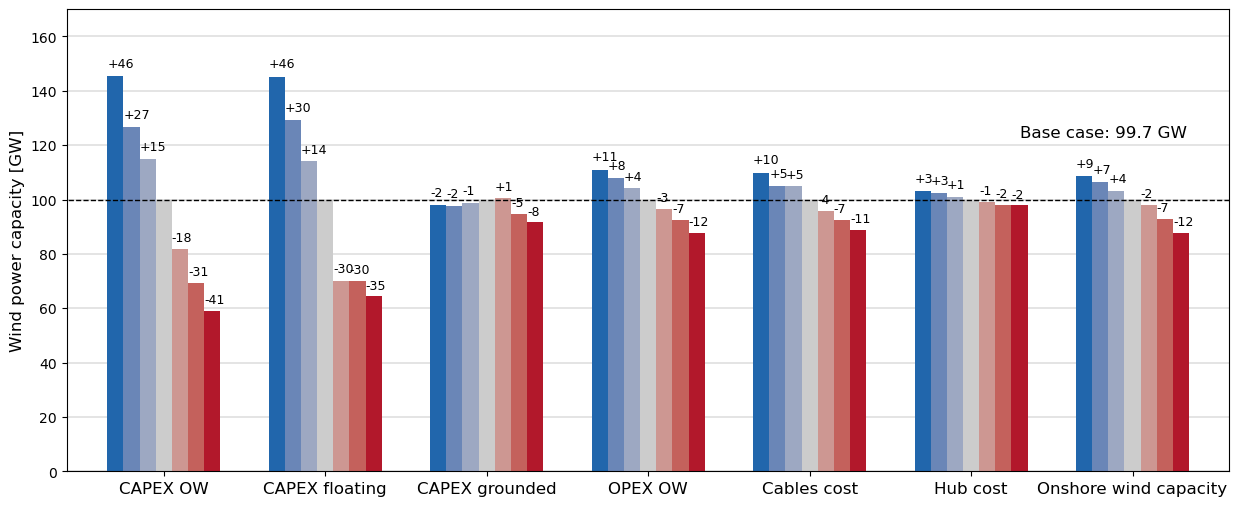

In [23]:
# Group the data by 'Period' and 'Case' and sum the 'genInstalledCap_MW' for each group
grouped_data = df_ow_NO.groupby(['Sensitivity', 'Case'], sort=False)['genInstalledCap_MW'].sum().unstack()

# Convert the summed values from MW to GW by dividing by 1000
grouped_data = grouped_data / 1000

case_order = ['-30%', '-20%', '-10%', 'Base', '+10%', '+20%','+30%']

# Plot the grouped data as a bar chart
plt.rcParams.update({'font.size': 10})
plt.rcParams['axes.prop_cycle'] = cycler(color=['#2166ac', '#6a86b7', '#9da8c2', '#cccccc', '#cd9792', '#c4615c', '#b2182b'])
ax = grouped_data[case_order].plot(kind='bar', figsize=(15, 6), width=0.7)

base_GW = grouped_data["Base"]["Cap"]
n30_cap_GW = grouped_data["-30%"]["Cap"]
n30_capFloating_GW = grouped_data["-30%"]["CapFloating"]

print(f"Diff cap vs cap floating: {round(n30_cap_GW-n30_capFloating_GW)}GW; In %: {round(((n30_cap_GW-n30_capFloating_GW)/n30_cap_GW)*100-1, 1)}%")


# Customize the chart
print(f'Installed offshore wind capacity (GW) in 2050 NO - sensitivity')
ax.set_ylabel('Wind power capacity [GW]', fontsize=12)
ax.set_xlabel(None)
ax.legend().remove()
#ax.legend(loc='upper left')
y_max = 170
ax.set_ylim(0, y_max)
ax.yaxis.grid(color='gray', linestyle='-', lw=0.3)
ax.set_axisbelow(True)
ax.set_xticklabels([SENSITIVITIES_TO_LABES[sens] for sens in SENSITIVITIES], rotation=0, fontsize=12)
ax.hlines(y=base_GW, xmin=-1, xmax=7, linewidth=1, linestyles="--", color='black')
plt.text(x=5.3, y=y_max*0.75, s=f"Base case: {round(base_GW, 1)} GW", verticalalignment='top', fontsize=12)
for i in range(len(SENSITIVITIES)):
    for j in range(len(case_order)):
        current_GW = grouped_data[case_order[j]][SENSITIVITIES[i]]
        diff_to_base_GW = current_GW - base_GW
        if abs(diff_to_base_GW) > 0.2:
            plt.text(x=i-0.35+j*0.1, y=current_GW+7-j*0.1, s=f"{'+' if diff_to_base_GW > 0 else ''}{round(diff_to_base_GW)}", verticalalignment='top', fontsize=9)

plt.savefig(f"SavedFigs/OW-sens-NO/Combined", bbox_inches="tight")
plt.show()

Calculate total inv cost for different scenarios NO

In [48]:
df_inv_NO = df_combined[df_combined["Node"].isin(NO_NODES)]
# Exclude from 2050-2060
df_inv_NO = df_inv_NO[(df_inv_NO["Period"] != "2050-2055") & (df_inv_NO["Period"] != "2055-2060")]
grouped_inv_NO = df_inv_NO.groupby(['Sensitivity', 'Case'], sort=False)['DiscountedInvestmentCost_Euro'].sum().unstack()
grouped_inv_NO

Case,Base,+10%,+20%,+30%,-10%,-20%,-30%
Sensitivity,,,,,,,
Cap,1.129961e+11,9.838772e+10,8.326344e+10,7.303937e+10,1.222002e+11,1.250262e+11,1.329799e+11
CapFloating,1.129961e+11,8.792529e+10,8.792529e+10,8.299593e+10,1.210430e+11,1.304172e+11,1.378971e+11
CapGrounded,1.129961e+11,1.138317e+11,1.078617e+11,1.020985e+11,1.128100e+11,1.082859e+11,1.049578e+11
Opex,1.129961e+11,1.111254e+11,1.080383e+11,1.032978e+11,1.157745e+11,1.191676e+11,1.208603e+11
Cables,1.129961e+11,1.079345e+11,1.025857e+11,9.758453e+10,1.197082e+11,1.197082e+11,1.272406e+11
HubCost,1.129961e+11,1.116845e+11,1.097257e+11,1.076471e+11,1.148472e+11,1.186074e+11,1.206383e+11
OnshrWind,1.129961e+11,1.102375e+11,1.044444e+11,9.837346e+10,1.178943e+11,1.220958e+11,1.254024e+11


In [49]:
# Cost savings capex only floating vs both
cost_CapN30_NO = grouped_inv_NO["-30%"]["Cap"]
cost_CapFloatingN30_NO = grouped_inv_NO["-30%"]["CapFloating"]

cost_diff_NO = (cost_CapFloatingN30_NO - cost_CapN30_NO) / 10**9 # in BEUR
cost_diff_NO

4.917253017087082

#### Change in other technologies

In [50]:
# Get total capacity for techs in given period and case
total_gen_by_sens_and_case = df_combined.groupby(['Sensitivity', 'Case', 'GeneratorType'])['genInstalledCap_MW'].sum().to_dict()

# Unique values
sensitivities = sorted(set([sens for (sens, _, _) in total_gen_by_sens_and_case.keys()]))
cases = set([case for (_, case, _) in total_gen_by_sens_and_case.keys()])
techs = set([tech for (_, _, tech) in total_gen_by_sens_and_case.keys()])

# Convert from MW to GW
total_gen_by_sens_and_case = {k: v / 1000 for k, v in total_gen_by_sens_and_case.items()}

# Create dataframe
df_rows = []
df_cols = ["Period", "Sensitivity", "Case", "Tech", "Installed capacity GW"]

for (sens, case, tech), cap in total_gen_by_sens_and_case.items():
    df_rows.append(["2045-2050", sens, case, tech, cap])

df_total_gen = pd.DataFrame(df_rows, columns=df_cols)
df_total_gen

,Period,Sensitivity,Case,Tech,Installed capacity GW
0,2045-2050,Cables,+10%,Bio,863.583953
1,2045-2050,Cables,+10%,Bio10cofiring,98.638991
2,2045-2050,Cables,+10%,Bio10cofiringCCS,0.000000
3,2045-2050,Cables,+10%,Bioexisting,109.500286
4,2045-2050,Cables,+10%,Coal,0.001620
...,...,...,...,...,...
1367,2045-2050,Opex,Base,Waste,86.657928
1368,2045-2050,Opex,Base,Wave,10.380002
1369,2045-2050,Opex,Base,Windoffshorefloating,203.392885
1370,2045-2050,Opex,Base,Windoffshoregrounded,1398.417914


Calculated diff to base for each row

In [51]:
lookup_table = df_total_gen.copy()

def diff_to_base_GW(df_row):
    sens = df_row["Sensitivity"]
    tech = df_row["Tech"]
    case = "Base"
    base_value = lookup_table[(sens == lookup_table["Sensitivity"]) & \
                              (tech == lookup_table["Tech"]) & \
                                (case == lookup_table["Case"])]["Installed capacity GW"].sum()
    
    df_row["GW base"] = round(base_value, 1)
    df_row["GW diff to base"] = round(df_row["Installed capacity GW"] - base_value, 1)

    if base_value > 0:
        df_row["GW diff to base %"] = round((df_row["Installed capacity GW"]/base_value - 1) * 100, 1)
    else:
        df_row["GW diff to base %"] = "N/A"

    df_row["Installed capacity GW"] = round(df_row["Installed capacity GW"], 1)

    return df_row

df_total_gen = df_total_gen.apply(lambda row: diff_to_base_GW(row), axis=1)

# Remove small diffs (<10 MW)
df_total_gen_sens = df_total_gen[abs(df_total_gen["GW diff to base"]) > 0.01].reset_index(drop=True)
df_total_gen_sens

,Period,Sensitivity,Case,Tech,Installed capacity GW,GW base,GW diff to base,GW diff to base %
0,2045-2050,Cables,+10%,Bio,863.6,864.1,-0.5,-0.1
1,2045-2050,Cables,+10%,Bio10cofiring,98.6,99.2,-0.5,-0.5
2,2045-2050,Cables,+10%,GasCCGT,1413.6,1407.9,5.6,0.4
3,2045-2050,Cables,+10%,GasOCGT,954.8,964.2,-9.4,-1.0
4,2045-2050,Cables,+10%,Hydroregulated,820.2,820.8,-0.7,-0.1
...,...,...,...,...,...,...,...,...
534,2045-2050,Opex,-30%,Solar,7768.5,7801.9,-33.5,-0.4
535,2045-2050,Opex,-30%,Waste,86.2,86.7,-0.4,-0.5
536,2045-2050,Opex,-30%,Windoffshorefloating,257.3,203.4,53.9,26.5
537,2045-2050,Opex,-30%,Windoffshoregrounded,1454.9,1398.4,56.5,4.0


Filter by period and case to look at values

In [52]:
FILTER_SENS = "CapFloating" 
FILTER_CASE = "-30%"

df_total_gen_sens_filtered = df_total_gen_sens[(df_total_gen_sens["Sensitivity"] == FILTER_SENS) & (df_total_gen_sens["Case"] == FILTER_CASE)]
df_total_gen_sens_filtered.sort_values(by=["GW diff to base"], ascending=False)

,Period,Sensitivity,Case,Tech,Installed capacity GW,GW base,GW diff to base,GW diff to base %
229,2045-2050,CapFloating,-30%,Windoffshorefloating,606.4,203.4,403.0,198.2
222,2045-2050,CapFloating,-30%,GasOCGT,983.5,964.2,19.3,2.0
223,2045-2050,CapFloating,-30%,Hydroregulated,823.3,820.8,2.5,0.3
225,2045-2050,CapFloating,-30%,Lignite,232.4,230.0,2.4,1.1
224,2045-2050,CapFloating,-30%,Hydrorun-of-the-river,891.5,891.4,0.1,0.0
220,2045-2050,CapFloating,-30%,Bio10cofiring,99.1,99.2,-0.1,-0.1
221,2045-2050,CapFloating,-30%,GasCCGT,1407.6,1407.9,-0.4,-0.0
228,2045-2050,CapFloating,-30%,Waste,86.2,86.7,-0.4,-0.5
219,2045-2050,CapFloating,-30%,Bio,827.5,864.1,-36.7,-4.2
226,2045-2050,CapFloating,-30%,Nuclear,1281.4,1341.1,-59.7,-4.4
